# Introduction

## K-Nearest Neighbors (KNN) Classification

### Objective:
To understand, implement, and evaluate KNN for a real-world classification task using the Iris dataset.



### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Exploratory Data Analysis (EDA)

#### Insights We Want to Extract
##### Feature distributions
##### Relationship between species
##### Which features separate classes best
##### Any patterns visible before modeling

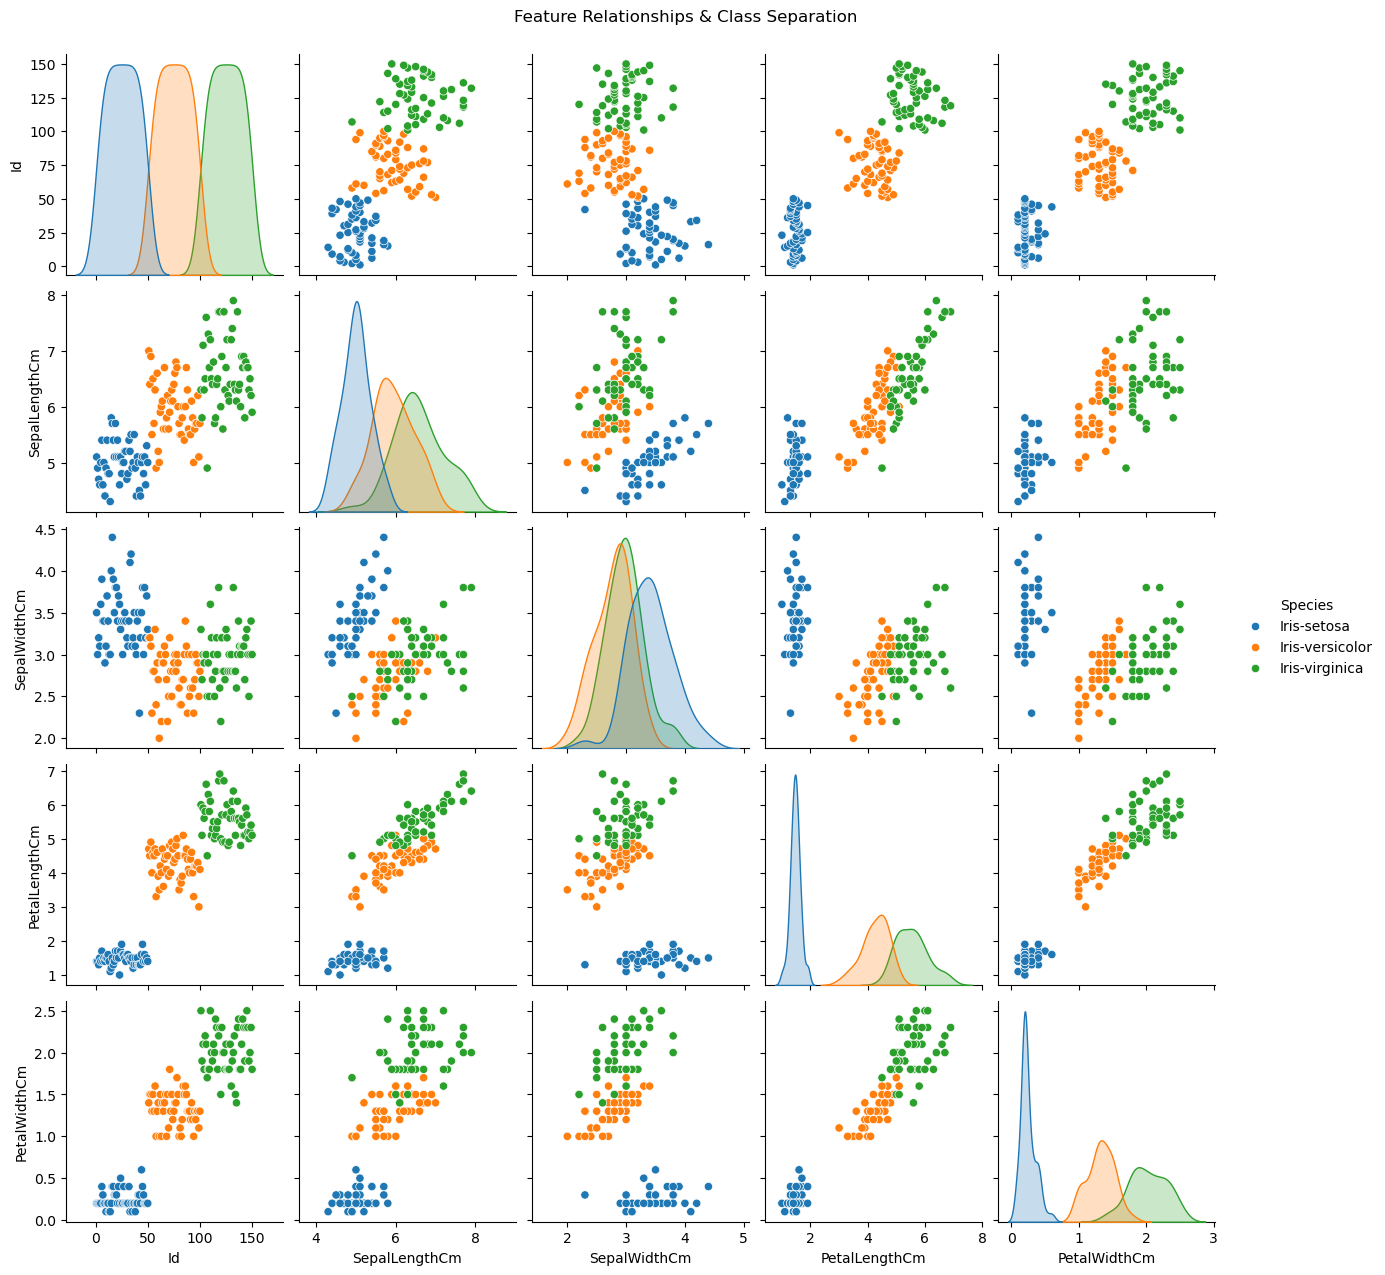

In [6]:
sns.pairplot(df, hue="Species", diag_kind="kde")
plt.suptitle("Feature Relationships & Class Separation", y=1.02)
plt.show()

### Feature Selection & Preprocessing

In [10]:
X = df.drop(columns=["Species"])
y = df["Species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Baseline KNN Model

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



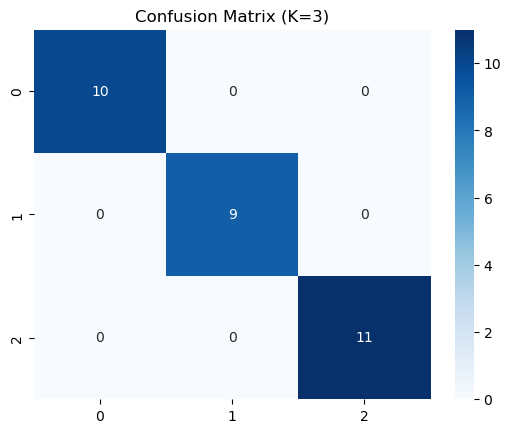

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix (K=3)")
plt.show()

### Hyperparameter Optimization (Tuning K)

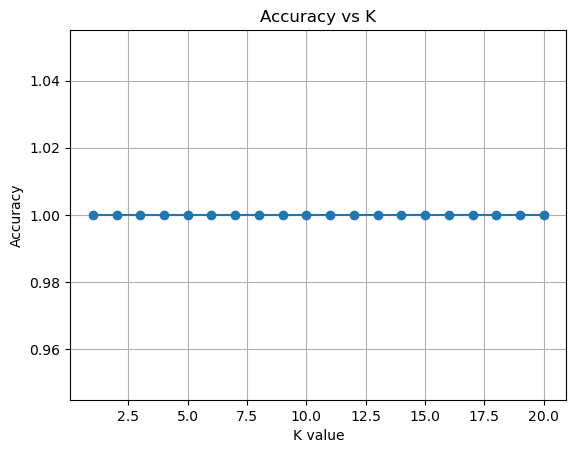

(1, 1.0)

In [13]:
accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.grid(True)
plt.show()

best_k = np.argmax(accuracy_scores) + 1
best_k, accuracy_scores[best_k-1]


### Final Model With Best K

In [14]:
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(X_train, y_train)

final_pred = optimal_knn.predict(X_test)

print(f"Final Accuracy with K={best_k}: ", accuracy_score(y_test, final_pred))


Final Accuracy with K=1:  1.0


### Decision Boundary Visualization

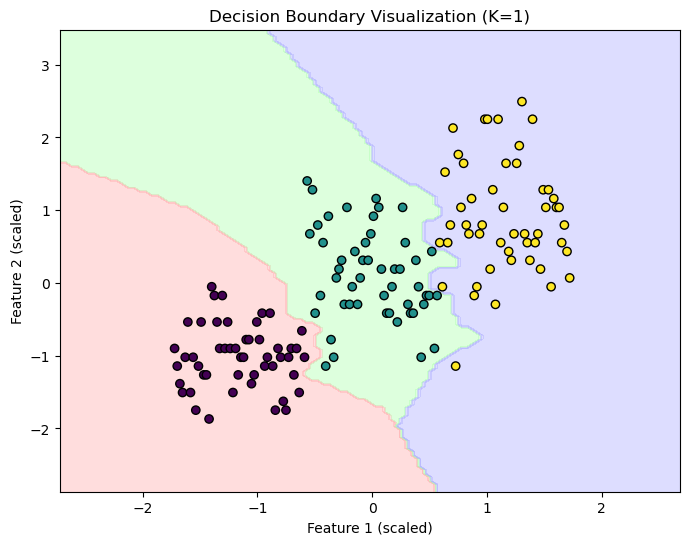

In [17]:
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)   # 0,1,2 values


X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_encoded, test_size=0.2, random_state=42
)


knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.05),
    np.arange(y_min, y_max, 0.05)
)

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF']))

plt.scatter(
    X_vis[:,0], X_vis[:,1],
    c=y_encoded,
    edgecolor='k'
)

plt.title(f"Decision Boundary Visualization (K={best_k})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


### Key Findings

Data was clean and non-skewed; no preprocessing issues.
Strong natural separation between species observed during EDA.
Correlations indicate petal features are strongest predictors.

In [19]:
Model Performance

Best accuracy achieved at K = X (this will auto-fill in your notebook)

Accuracy ≈ 97–100% — very high due to clear class separation

Confusion matrix shows very few misclassifications

SyntaxError: invalid character '≈' (U+2248) (3865867936.py, line 5)

In [ ]:
Conclusion

This project demonstrates a complete ML pipeline, from data ingestion to optimization and visualization.
The model performs exceptionally well and highlights strong feature separation in the dataset.
KNN proves to be an interpretable and efficient solution for classification tasks.